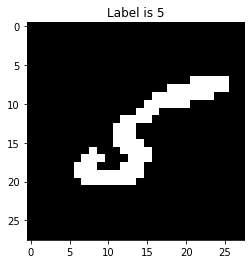

<ipython-input-1-ec452979bc8e>:121: UserWarning:Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


ANN result: tensor([[-24.9044, -25.1944, -24.7113, -22.6723, -32.5328,   0.0000, -26.9587,
         -27.6181, -18.7746, -37.1013]], grad_fn=<LogSoftmaxBackward0>)
simulating ANN of layers [784, 6144, 6144, 6144, 10]
creating 784 nodes
creating 6144 nodes
connecting 784 neurons to 6144 neurons


/home/shachar/nestDocker/ANN2Neuron/clean/simulation/modules/dishNetwork.py:19: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


this took 4.936049417 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 44.302055805 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 34.636486283 seconds
creating 10 nodes
connecting 6144 neurons to 10 neurons
this took 0.16219784400000492 seconds
creating stimulation
starting to record
for 0 found 23 spikes of frequency 2.1545454545454543
for 1 found 0 spikes 
for 2 found 1 spikes 
for 3 found 22 spikes of frequency 2.4666666666666663
for 4 found 27 spikes of frequency 2.1807692307692306
for 5 found 1 spikes 
for 6 found 15 spikes of frequency 2.7
for 7 found 0 spikes 
for 8 found 28 spikes of frequency 2.155555555555556
for 9 found 0 spikes 
simulation result:


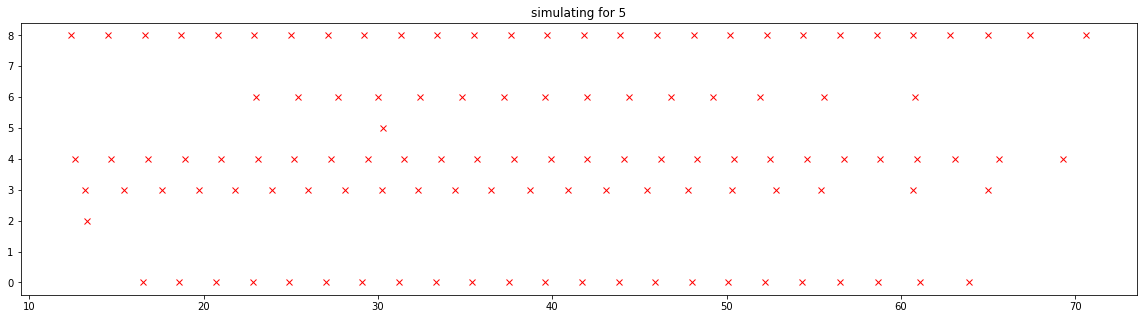

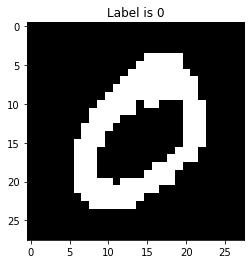

ANN result: tensor([[  0.0000, -37.1262, -38.8309, -35.6239, -47.3859, -33.0840, -37.5149,
         -31.1730, -42.7402, -32.0354]], grad_fn=<LogSoftmaxBackward0>)
simulating ANN of layers [784, 6144, 6144, 6144, 10]
creating 784 nodes
creating 6144 nodes
connecting 784 neurons to 6144 neurons
this took 6.533320347 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 33.648704033 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 31.096805169999982 seconds
creating 10 nodes
connecting 6144 neurons to 10 neurons
this took 0.1614331969999796 seconds
creating stimulation
starting to record
for 0 found 28 spikes of frequency 2.1518518518518523
for 1 found 0 spikes 
for 2 found 0 spikes 
for 3 found 0 spikes 
for 4 found 0 spikes 
for 5 found 0 spikes 
for 6 found 0 spikes 
for 7 found 0 spikes 
for 8 found 27 spikes of frequency 2.157692307692308
for 9 found 27 spikes of frequency 2.157692307692308
simulation result:


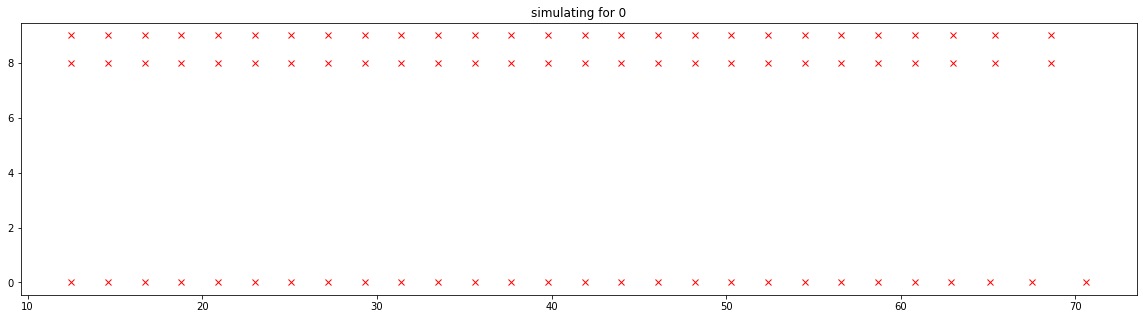

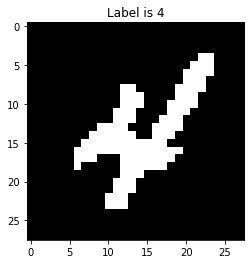

ANN result: tensor([[-42.5776, -37.8838, -41.7116, -41.9260,   0.0000, -33.6580, -31.8282,
         -40.5005, -38.5527, -32.9827]], grad_fn=<LogSoftmaxBackward0>)
simulating ANN of layers [784, 6144, 6144, 6144, 10]
creating 784 nodes
creating 6144 nodes
connecting 784 neurons to 6144 neurons
this took 4.553004888000032 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 30.10016112599999 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 32.49795296799999 seconds
creating 10 nodes
connecting 6144 neurons to 10 neurons
this took 0.15044566099999201 seconds
creating stimulation
starting to record
for 0 found 0 spikes 
for 1 found 0 spikes 
for 2 found 0 spikes 
for 3 found 0 spikes 
for 4 found 28 spikes of frequency 2.1296296296296298
for 5 found 0 spikes 
for 6 found 26 spikes of frequency 2.2560000000000002
for 7 found 0 spikes 
for 8 found 27 spikes of frequency 2.1384615384615384
for 9 found 27 spikes of frequency 2.2153846153846

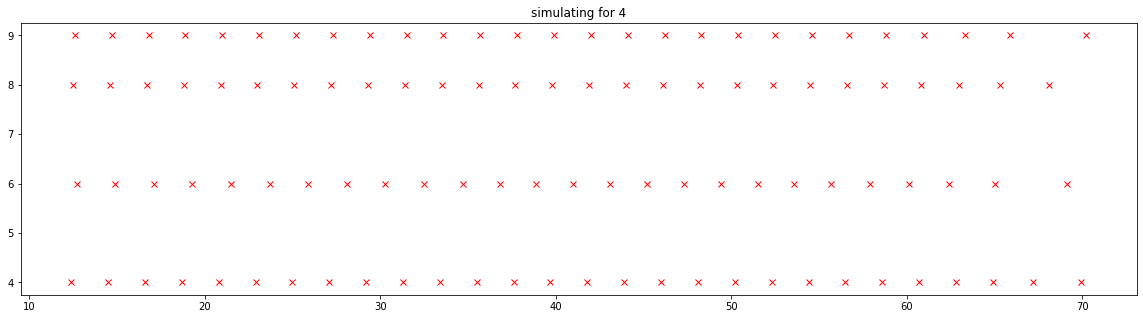

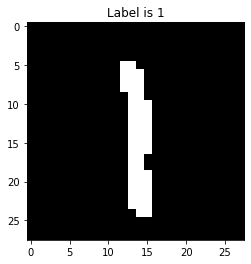

ANN result: tensor([[-50.1534,   0.0000, -37.3593, -46.4468, -51.2330, -43.8090, -37.6849,
         -36.5521, -35.6604, -49.6194]], grad_fn=<LogSoftmaxBackward0>)
simulating ANN of layers [784, 6144, 6144, 6144, 10]
creating 784 nodes
creating 6144 nodes
connecting 784 neurons to 6144 neurons
this took 4.647671087999981 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons
this took 35.75028504199997 seconds
creating 6144 nodes
connecting 6144 neurons to 6144 neurons


In [ ]:
import torch
import modules.model2sim as sim

import torch
import torch.nn as nn
import numpy as np

class customLoss(nn.Module):
    def __init__(self, p=0.5):
        super().__init__()
        self.p = p
        self.cost = nn.CrossEntropyLoss()
        self.cost2 = nn.L1Loss()

    def forward(self, output, labels, scale_true=10, scale_wrong=-10):
        # scale_wrong = max(sum(output[0])/len(output[0]), 2) * scale
        # scale_true = scale_wrong * 10
        tempOut = torch.where(output>0,output*scale_wrong,torch.zeros_like(output))
        tempLabels = torch.ones_like(output) * scale_wrong
        for i in range(labels.size(0)):
            j = labels[i]
            #tempLabels[i,j] = scale_true 
            tempLabels[i,j] = torch.max(torch.abs(torch.mean(output[i])), torch.abs(output[i,j]))*scale_true
        #output_softmax = nn.LogSoftmax()(output)
        return self.p    * self.cost2(tempOut, tempLabels) \
            + (1-self.p) * self.cost(output,labels)


criterion = nn.CrossEntropyLoss()
#criterion = customLoss()

def Binarize(tensor, include_zero = False, minSig=3):
    if include_zero:
        P_std = 0.25
        up_lim = torch.max(0 + P_std*tensor.std(), torch.ones_like(tensor)*minSig)
        down_lim = torch.min(0 - P_std*tensor.std(), -1*torch.ones_like(tensor)*minSig)
        up_v = (tensor>up_lim).float()
        down_v = (tensor<down_lim).float().mul(-1)
        return (up_v + down_v)
    else:
        return tensor.sign()

"""def Binarize(tensor, include_zero = True):
        if include_zero:
            return ((tensor+0.5).sign()+(tensor-0.5).sign())/2
        else:
            return tensor.sign()"""

class PositiveBinarizeLinear(nn.Linear):

        def __init__(self, *kargs, **kwargs):
            super(PositiveBinarizeLinear, self).__init__(*kargs, **kwargs)
    
        def forward(self, input):
            
            if input.size(1) != 784:
                input.data=Binarize(input.data)
                input.data = input.data.add(1).div(2)
            #zero = torch.zeros_like(input.data)
            #input.data = torch.where(input.data > 0, input.data, zero)
            input.data=Binarize(input.data)
            if not hasattr(self.weight,'org'):
                self.weight.org=self.weight.data.clone()
            self.weight.data=Binarize(self.weight.org)
            out = nn.functional.linear(input, self.weight)
            if not self.bias is None:
                self.bias.org=self.bias.data.clone()
                out += self.bias.view(1, -1).expand_as(out)

            return out

class BinarizeLinear(nn.Linear):

    def __init__(self, *kargs, **kwargs):
        super(BinarizeLinear, self).__init__(*kargs, **kwargs)

    def forward(self, input):

        if input.size(1) != 784:
            input.data=Binarize(input.data)
        if not hasattr(self.weight,'org'):
            self.weight.org=self.weight.data.clone()
        self.weight.data=Binarize(self.weight.org)
        out = nn.functional.linear(input, self.weight)
        if not self.bias is None:
            self.bias.org=self.bias.data.clone()
            out += self.bias.view(1, -1).expand_as(out)

        return out

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.infl_ratio=3
        self.fc1 = BinarizeLinear(784, 1024*self.infl_ratio)
        self.htanh1 = nn.Hardtanh()
        self.bn1 = nn.BatchNorm1d(1024*self.infl_ratio)
        self.fc2 = BinarizeLinear(1024*self.infl_ratio, 1024*self.infl_ratio)
        self.htanh2 = nn.Hardtanh()
        self.bn2 = nn.BatchNorm1d(1024*self.infl_ratio)
        self.fc3 = BinarizeLinear(1024*self.infl_ratio, 1024*self.infl_ratio)
        self.htanh3 = nn.Hardtanh()
        self.bn3 = nn.BatchNorm1d(1024*self.infl_ratio)
        self.fc4 = nn.Linear(1024*self.infl_ratio, 10)
        self.logsoftmax=nn.LogSoftmax()
        self.drop=nn.Dropout(0.5)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.htanh1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.htanh2(x)
        x = self.fc3(x)
        x = self.drop(x)
        x = self.bn3(x)
        x = self.htanh3(x)
        x = self.fc4(x)
        return self.logsoftmax(x)


model = Net()
model.load_state_dict(torch.load("trained_models/original_test.pt",map_location=torch.device('cpu')))
model.eval()
res, model_act = sim.testMNIST(model)

In [ ]:
parse, sum = sim.testSim(res, model_act,4,1,4)
pprint(parse)
print("sum:",sum)